In [35]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from skimage.segmentation import slic


def cluster_image_and_plot(image, cluser_list, num_superpixel=False):
    
    if not isinstance(num_superpixel, bool):
        segments = slic(image, n_segments=num_superpixel, compactness=10, start_label=1)
        pixel_values = compute_superpixel_means(image, segments)
    else:
        pixel_values = image.reshape((-1, 3))
        pixel_values = np.float32(pixel_values)

    for K in cluser_list:
        # Apply KMeans
        kmeans = KMeans(n_clusters=K, random_state=42)
        kmeans.fit(pixel_values)

        # Get labels and cluster centers
        labels = kmeans.labels_

        # Generate random colors for each cluster
        random.seed(42)
        colors = []
        for i in range(K):
            # Random color for each cluster (in RGB)
            colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])
        colors = np.array(colors, dtype='uint8')

        if not isinstance(num_superpixel, bool):
            # Create a blank canvas for the segmented image
            segmented_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

            # Assign the K-means cluster color to each superpixel region
            for i, label in enumerate(np.unique(segments)):
                mask = segments == label
                segmented_image[mask] = colors[labels[i]]
        else:
            segmented_image = colors[labels.flatten()]
            segmented_image = segmented_image.reshape((image.shape[0], image.shape[1], 3))

        # Display the segmented image with colors
        plt.figure(figsize=(8, 6))
        plt.imshow(segmented_image)
        plt.title(f'Segmented Image with K={K}, and superpixel = {num_superpixel}')
        plt.axis('off')
        plt.show()


def compute_superpixel_means(image, segments):
    # Compute mean color for each superpixel
    superpixel_means = np.zeros((len(np.unique(segments)), 3))
    for i, label in enumerate(np.unique(segments)):
        # Get mask for the current superpixel
        mask = segments == label
        # Compute mean color for the superpixel (mean of R, G, B channels)
        superpixel_means[i] = image[mask].mean(axis=0)

    return superpixel_means


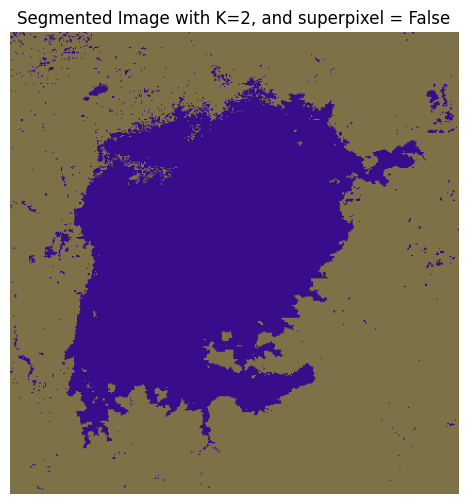

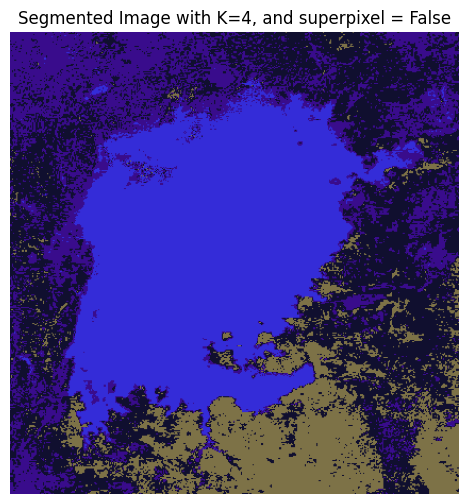

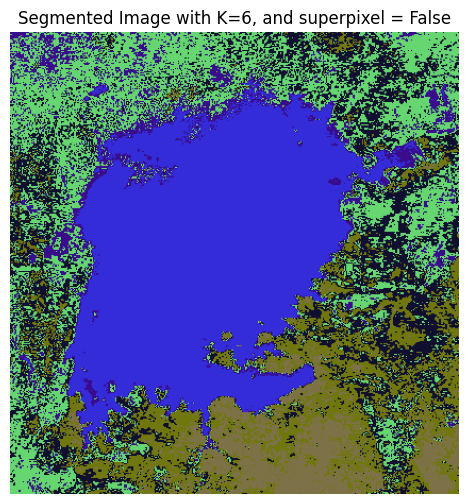

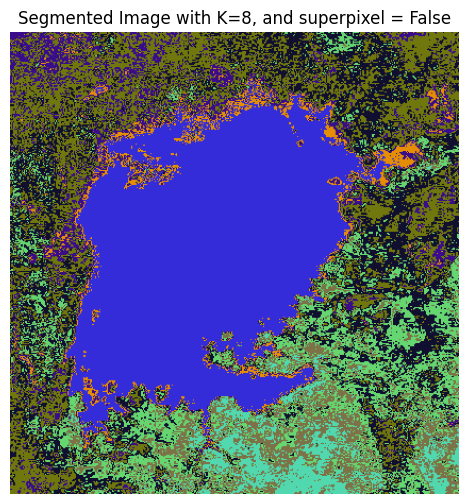

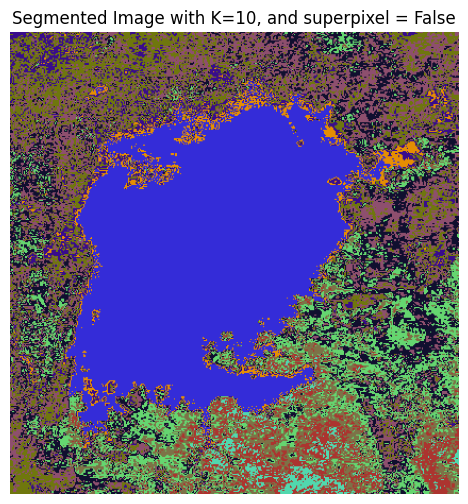

In [37]:
image = cv2.imread(f"data\lake_gray.png")

clusters = [2,4,6,8,10]

cluster_image_and_plot(image,clusters)

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


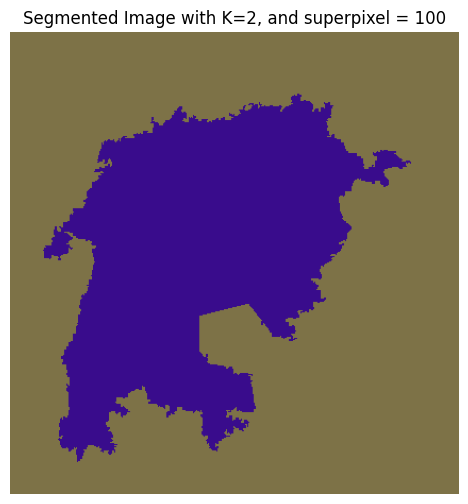

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


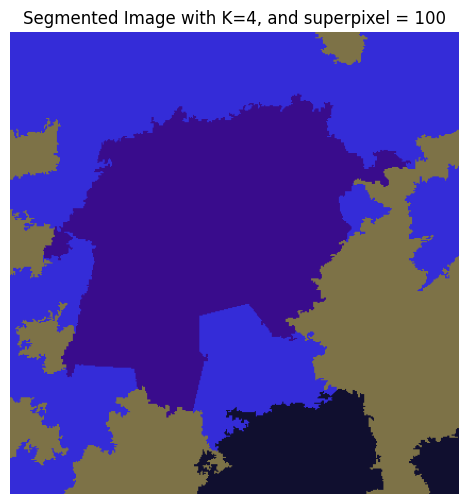

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


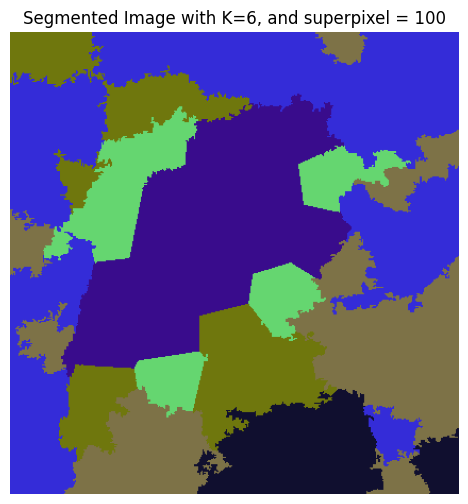

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


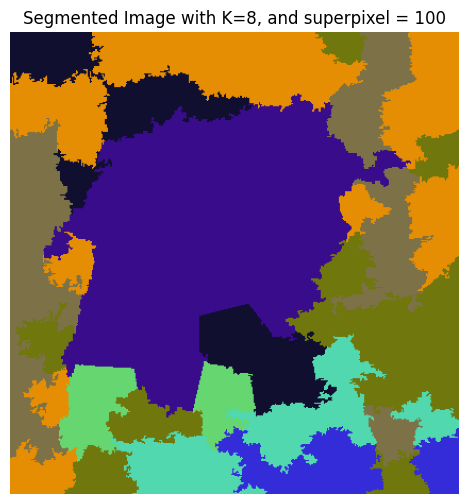

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


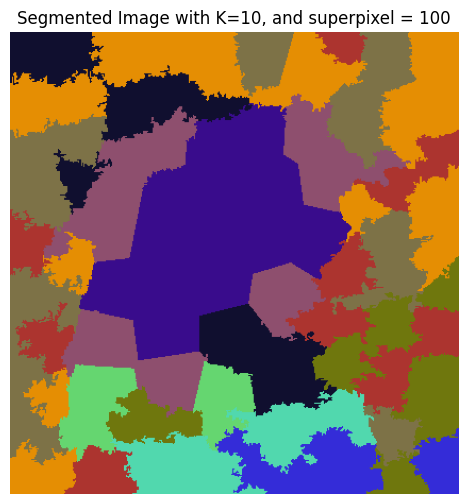

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


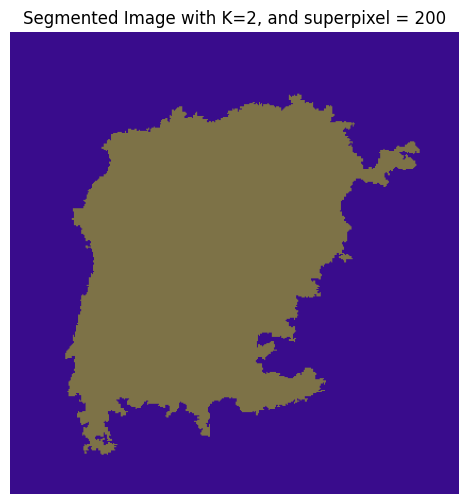

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


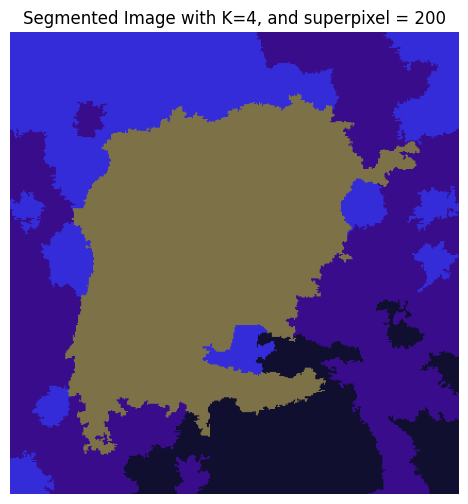

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


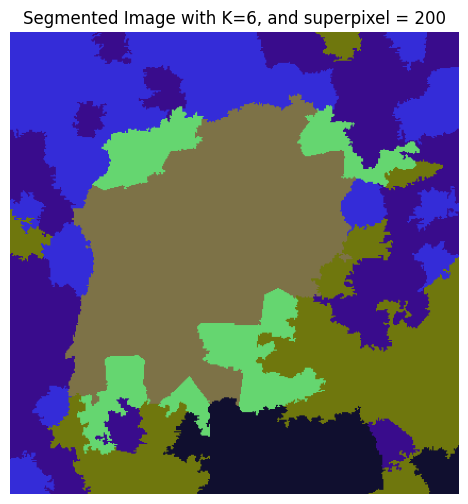

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


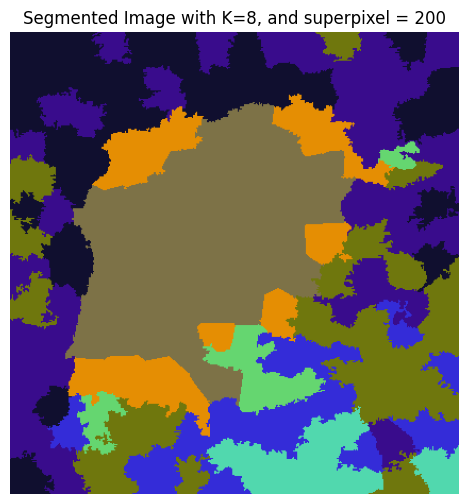

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


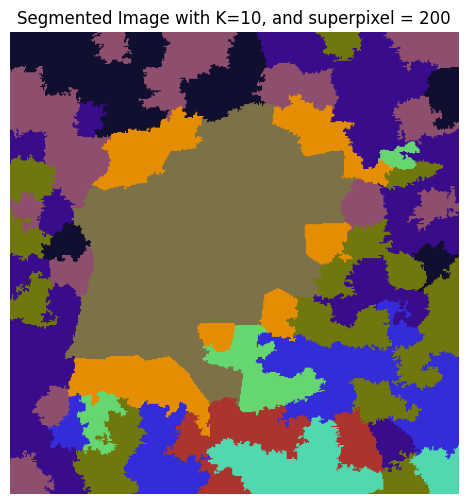

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


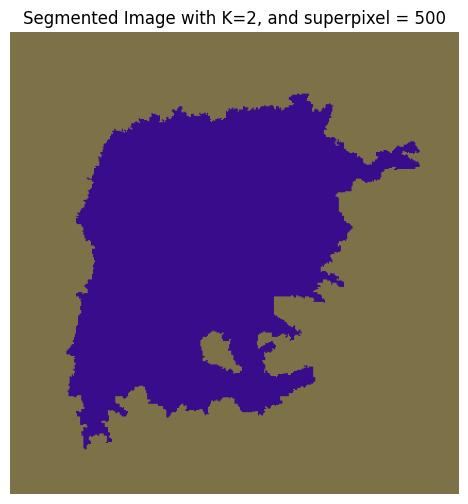

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


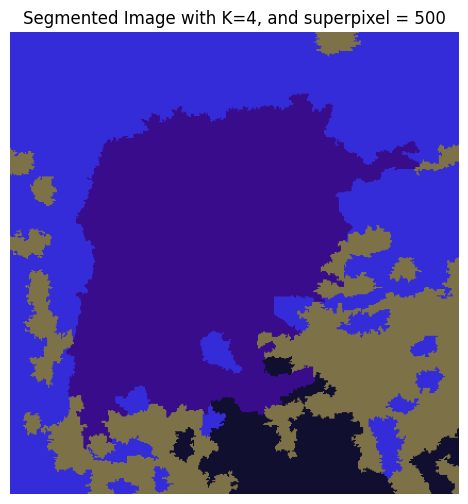

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


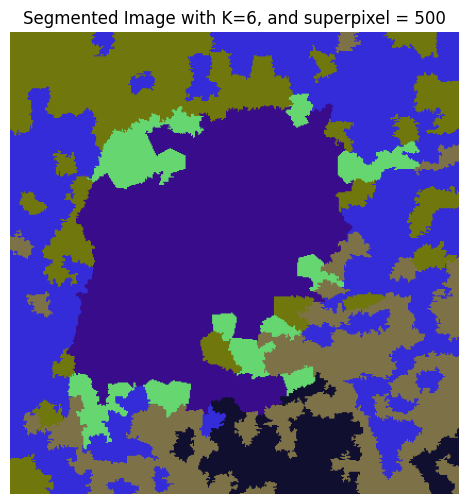

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


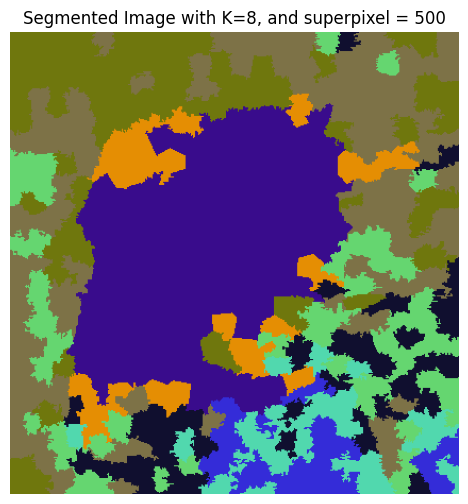

c:\Users\masv\AppData\Local\miniforge3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


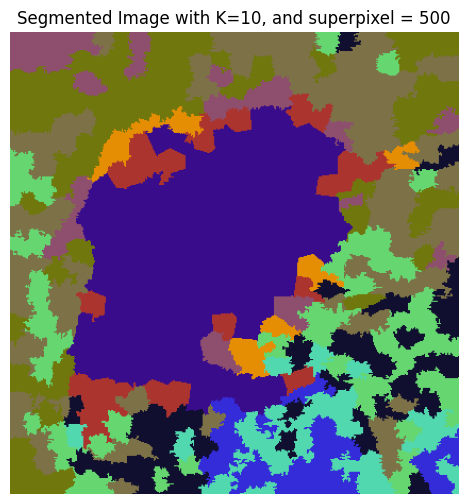

In [39]:
num_superpixels = [100,200,500]
for num_superpixel in num_superpixels:
    cluster_image_and_plot(image,clusters,num_superpixel)